In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import re

In [3]:
eu_states = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 
             'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 
             'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 
             'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']

### Maternity leave

In [3]:
col = 'Maternity leave (weeks)'

tables = pd.read_html('https://en.wikipedia.org/wiki/Parental_leave', header=0)

In [4]:
allDf = []

for table in tables:
    if table.columns[0] == 'Country':
        allDf.append(table)

africa = allDf[0]
americas = allDf[1]
asiaPacific = allDf[2]
europeCentralAsia = allDf[3]

In [5]:
europeCentralAsia = europeCentralAsia[1:].rename(columns={'Maternity leave':col})
allDf[3] = europeCentralAsia

In [6]:
americas = americas[1:].rename(columns={'Maternity leave':col})
allDf[1] = americas

In [7]:
africa = africa[1:].rename(columns={'Maternity leave':col})
allDf[0] = africa
[len(allDf[count]) for count in range(len(allDf))]

[52, 38, 41, 52]

In [8]:
asiaPacific

,Country,Paid maternity leave,Paid paternity leave,Unpaid maternity leave,Unpaid paternity leave,Restrictions
0,Afghanistan,90 days 100%,NaN,NaN,NaN,NaN
1,Azerbaijan,126 days 100%,NaN,NaN,NaN,NaN
2,Australia,18 weeks at National Minimum Wage (currently A...,2 weeks at National Minimum Wage,Up to 52 weeks unpaid shared between the parents,Up to 3 weeks of unpaid leave,The 52 weeks are shared between the parents an...
3,Bahrain,60 days 100%,NaN,NaN,NaN,NaN
4,Bangladesh,16 weeks (8 weeks before delivery and 8 weeks ...,NaN,"In case of third (+) time mother, who has two ...",NaN,NaN
5,Cambodia,90 days 50%,10 days special leave for family events,NaN,NaN,NaN
6,China,128 days 100%,NaN,NaN,NaN,NaN
7,Fiji,84 days Flat rate,NaN,NaN,NaN,NaN
8,Hong Kong,10 weeks 80%,3 days 80%,NaN,NaN,NaN
9,India,26 weeks 100%.,Up to 15 days (3 working weeks) male leave 100%,NaN,NaN,Does not apply to the state of Jammu and Kashm...


In [9]:
# Data correction
americas.iloc[9][col] = '17[113]'

In [10]:
def text_to_int(s):
    s == s.lower()
    firstNr = int(re.search(r'\d+', s).group())
    
    if 'day' in s:
        result = round(firstNr / 7)    
    elif 'month' in s:
        result = firstNr * 4.345
    else:
        result = firstNr
    
    return int(round(result))

In [11]:
asiaPacific[col] = asiaPacific['Paid maternity leave'].apply(lambda s: text_to_int(s))

In [12]:
asiaPacific.at[25, col] = 22
asiaPacific.at[26, col] = 14
asiaPacific.at[27, col] = 13
asiaPacific.at[34, col] = 24
asiaPacific.at[36, col] = 8

In [13]:
asiaPacific[['Country', 'Paid maternity leave', col]].head()

,Country,Paid maternity leave,Maternity leave (weeks)
0,Afghanistan,90 days 100%,13
1,Azerbaijan,126 days 100%,18
2,Australia,18 weeks at National Minimum Wage (currently A...,18
3,Bahrain,60 days 100%,9
4,Bangladesh,16 weeks (8 weeks before delivery and 8 weeks ...,16


In [14]:
mainDf = pd.concat(allDf, ignore_index=True, sort=False)
mainDf['Weeks'] = mainDf[col].apply(lambda s: int(re.search(r'\d+', str(s)).group()))

In [15]:
maternity = mainDf[['Country', 'Weeks']].sort_values('Weeks', ascending=False)
maternity.index = maternity.reset_index(drop=True).index + 1

In [16]:
maternity.head()

,Country,Weeks
1,Estonia,62
2,Bulgaria,58
3,Croatia,58
4,Bosnia and Herzegovina,52
5,United Kingdom,52


In [17]:
maternity.describe()

,Weeks
count,183.000000
mean,16.377049
std,9.732404
min,0.000000
25%,12.000000
50%,14.000000
75%,17.500000
max,62.000000


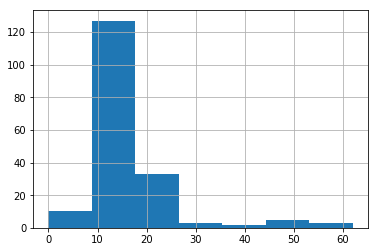

In [18]:
maternity['Weeks'].hist(bins=7)

In [19]:
#maternity.to_csv('data/maternity.csv', index_label='Rank')

### Atheism

In [20]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_atheism', header=0)

In [21]:
col = '"Believe in God, absolutely certain"(poll 2)**'
atheism = tables[6][['Country', col]].sort_values(col)
atheism.index = atheism.reset_index(drop=True).index + 1
atheism[col] = atheism[col].apply(lambda s: f'{s}%')
atheism.rename(columns={col:"Believe in God, absolutely certain"}, inplace=True)

In [22]:
#atheism.to_csv('data/atheism.csv', index_label='Rank')
atheism

,Country,"Believe in God, absolutely certain"
1,Estonia,13%
2,Czech Republic,13%
3,Russia,25%
4,Hungary,26%
5,Belarus,26%
6,Latvia,28%
7,Bulgaria,30%
8,Ukraine,32%
9,Lithuania,34%
10,Poland,45%


### Literacy

In [19]:
literacy_all = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_literacy_rate', header=0)
literacy = literacy_all[2][1:].rename(columns={'Unnamed: 0':'Country', 'Elderly(65+)':'Adult literacy'})

In [38]:
literacy = literacy[['Country', 'Adult literacy']]
literacy.sort_values('Adult literacy', inplace=True, ascending=False)

eu_mask = literacy['Country'].apply(lambda x: x in eu_states)
literacy = literacy[eu_mask]
literacy = literacy[literacy['Adult literacy'].notnull()]
literacy.index = literacy.reset_index(drop=True).index + 1

literacy.to_csv('data/literacy.csv', index_label='Rank')
literacy

,Country,Adult literacy
1,Estonia,99.9
2,Latvia,99.9
3,Lithuania,99.8
4,Slovenia,99.7
5,Croatia,99.1
6,Hungary,99.1
7,Italy,98.8
8,Poland,98.7
9,Cyprus,98.7
10,Romania,98.6


### PISA

In [69]:
pisa_all = pd.read_html('https://en.wikipedia.org/wiki/Programme_for_International_Student_Assessment', header=0)

In [114]:
def get_formatted_df(id):
    pisa = pisa_all[id].iloc[2:, :2]
    title = pisa.columns[0]
    pisa = pisa.rename(columns={title:'Country', 'Unnamed: 1':title})
    pisa[title] = pisa[title].astype(int)
    
    pisa.sort_values(title, inplace=True, ascending=False)
    return pisa
    

In [115]:
math = get_formatted_df(1)
reading = get_formatted_df(2)
science = get_formatted_df(3)

In [124]:
pisa_main = pd.merge(science, math, on='Country')
pisa_main = pd.merge(pisa_main, reading, on='Country')
pisa_main['Total'] = pisa_main.Science + pisa_main.Math + pisa_main.Reading
pisa_main.sort_values('Total', inplace=True, ascending=False)
eu_mask = pisa_main['Country'].apply(lambda x: x in eu_states)
pisa = pisa_main[eu_mask]
pisa.index = pisa.reset_index(drop=True).index + 1

pisa.to_csv('data/pisa.csv', index_label='Rank')
pisa

,Country,Science,Math,Reading,Total
1,Estonia,534,520,519,1573
2,Finland,531,511,526,1568
3,Slovenia,513,510,505,1528
4,Ireland,503,504,521,1528
5,Netherlands,509,512,503,1524
6,Germany,509,506,509,1524
7,Denmark,502,511,500,1513
8,Poland,501,504,506,1511
9,Belgium,502,507,499,1508
10,United Kingdom,509,492,498,1499
